# Part 1: London’s underground resilience

# I.Topological network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import networkx as nx
import pandas as pd
from operator import itemgetter
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from math import sqrt
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
#load the graphml file for London's underground

G = nx.read_graphml('/content/drive/MyDrive/Urban Simulation/london.graph.xml')


In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

401
467


In [ ]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [ ]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [ ]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

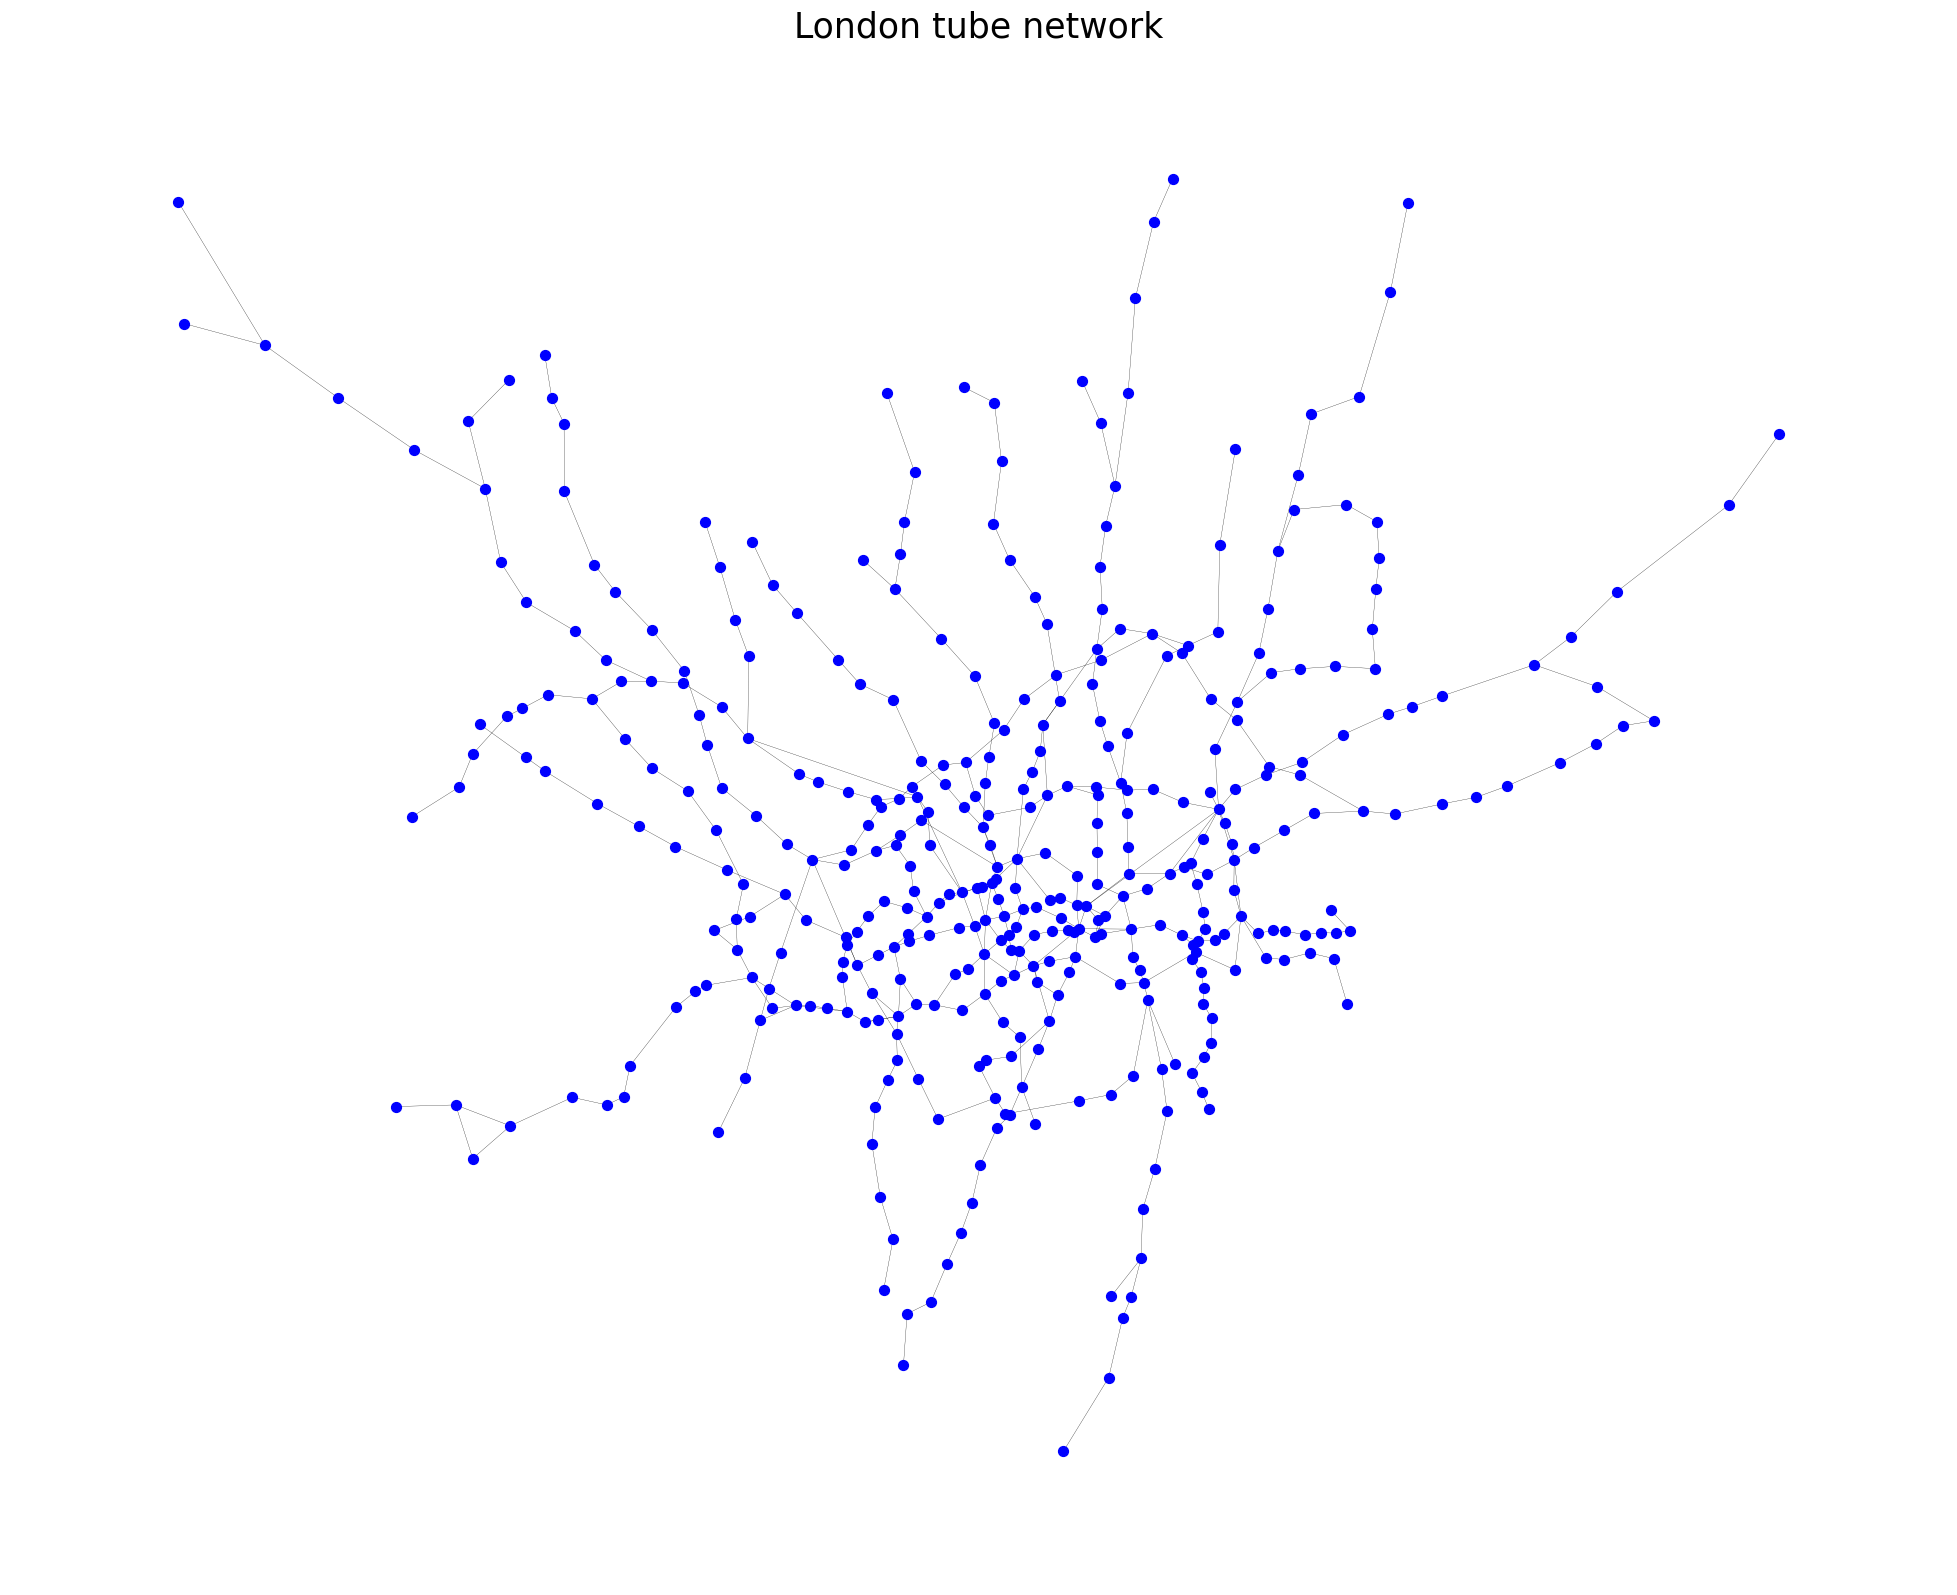

In [ ]:
# Let's plot the tube network!

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
nx.draw_networkx_labels(G,pos, node_labels, font_size=5, font_color='black')

plt.title("London tube network",fontsize=25)
plt.axis("off")
plt.show()


In [ ]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,line_name,flows
0,Wembley Park,Kingsbury,2916.771558,Jubilee,12356
1,Wembley Park,Neasden,2353.165938,Jubilee,6744
2,Wembley Park,Preston Road,1419.735166,Metropolitan,36601
3,Wembley Park,Finchley Road,7266.373927,Metropolitan,55216
4,Kingsbury,Queensbury,1245.995234,Jubilee,9419
5,Queensbury,Canons Park,1693.307343,Jubilee,6385
6,Canons Park,Stanmore,1419.669476,Jubilee,3624
7,Stratford,West Ham,1673.509515,Jubilee,91801
8,Stratford,Mile End,2805.001392,Central,12010
9,Stratford,Leyton,2131.342926,Central,56082


## I.1.Centrality Measures

### Degree Centrality

In [ ]:
# We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')


In [ ]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


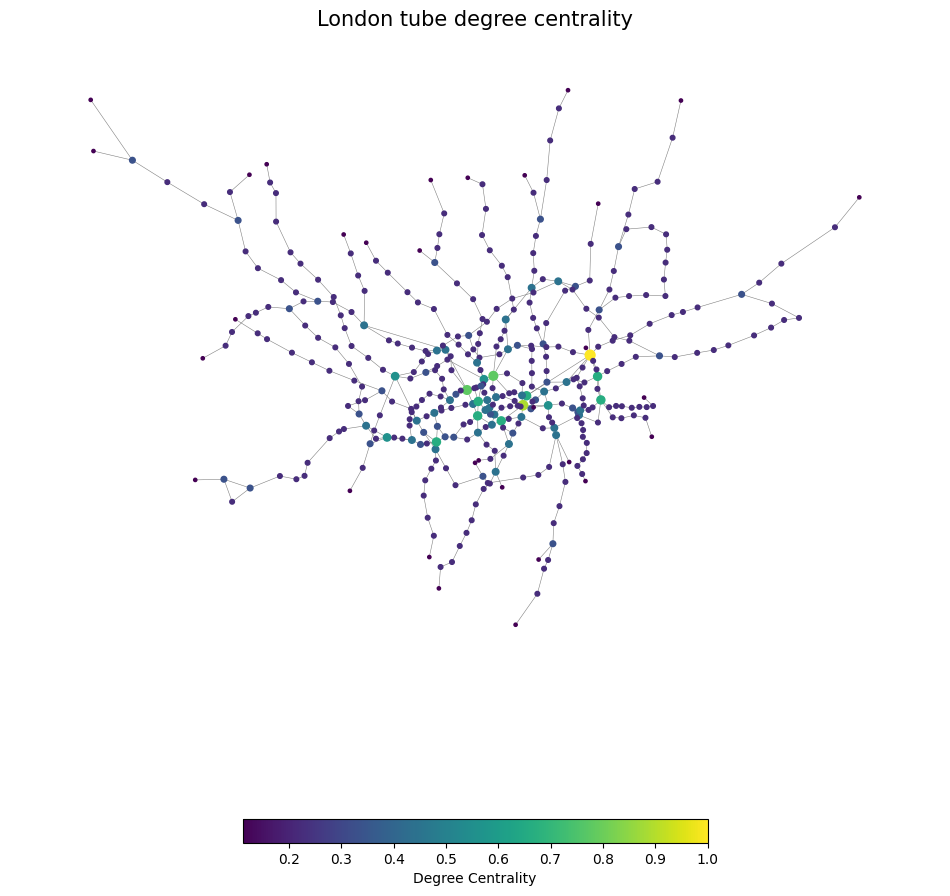

In [ ]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot
pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray',
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube degree centrality",fontsize=15)
plt.show()

### Topological Betweenness centrality

In [9]:
# Let us compute the betweenness centrality for the network, without using weights:
bet_london_t =nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


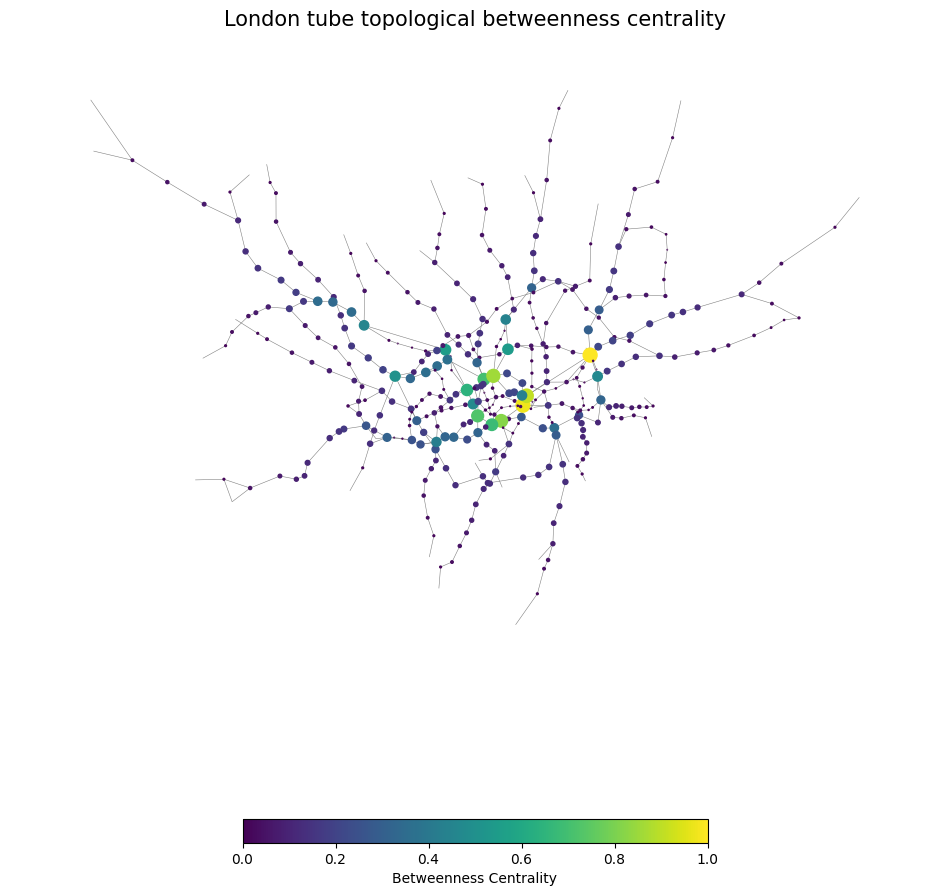

In [ ]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological betweenness centrality",fontsize=15)
plt.show()

### Topological closeness centrality

In [ ]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

,closeness_t
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


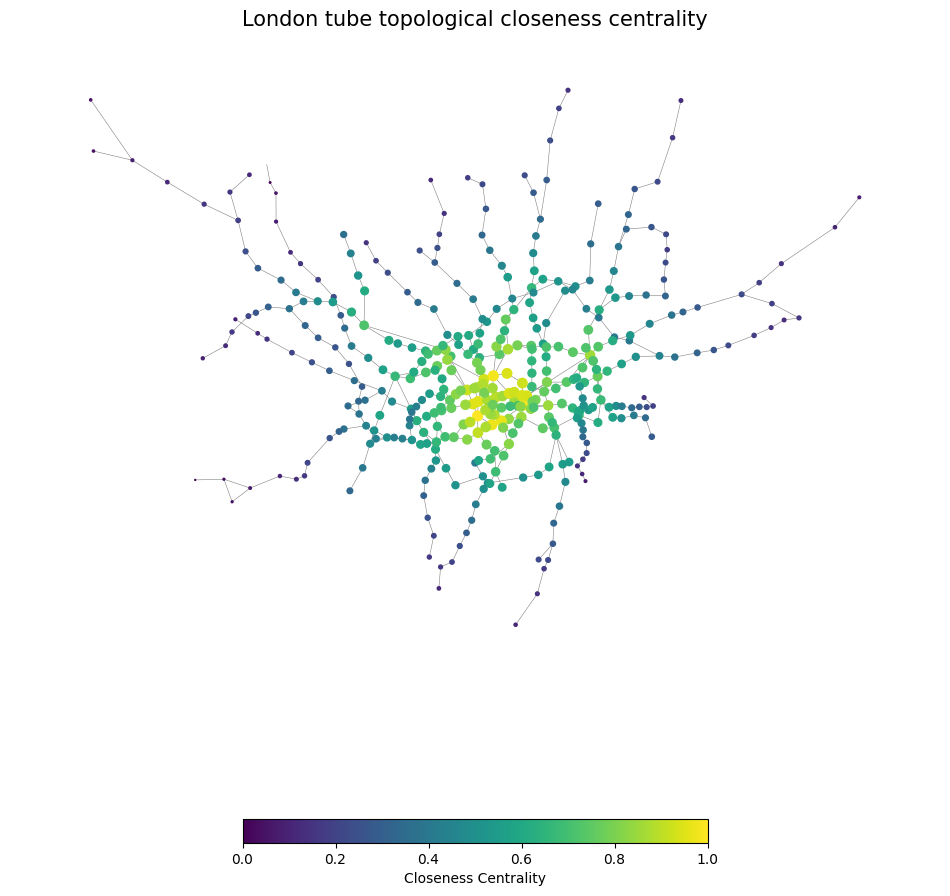

In [ ]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray',
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London tube topological closeness centrality",fontsize=15)
plt.show()

##I.2.Measure to assess impact

### Global Efficiency

In [ ]:
global_efficiency = nx.global_efficiency(G)

### Average Shortest Path Length

In [ ]:
aspl = nx.average_shortest_path_length(G)

## I.3.Node removal (Analysis)

Graph names:

1. Degree Centrality G1
*  Sequential Analysis = G1_s
*  Non-sequential = G1_ns

2. Betweenness Centrality G2
* Sequential Analysis = G2_s
* Non-sequential = G2_ns

3. Closeness Centrality
* Sequential Analysis = G3_s
* Non-sequential = G3_ns


Measurment:
1.   global efficiency
2.   average short path length


**Degree Centrality**

Non-Sequential

In [ ]:

# Create a sample graph (replace this with your actual graph)
G1_ns = G.copy()

# List of nodes sorted by centrality
nodes_by_centrality = ['Stratford', 'Bank and Monument', 'King\'s Cross St. Pancras', 'Baker Street',
                       'Earl\'s Court', 'Oxford Circus', 'Liverpool Street', 'Waterloo',
                       'Green Park', 'Canning Town']

# Store initial global efficiency and initial average shortest path length
efficiencies = [nx.global_efficiency(G1_ns)]
# Calculate ASPL for the largest connected component or set to inf if graph is disconnected
avg_shortest_paths = [nx.average_shortest_path_length(G1_ns) if nx.is_connected(G1_ns) else float('inf')]

for node in nodes_by_centrality:
    G1_ns.remove_node(node)
    eff = nx.global_efficiency(G1_ns)
    efficiencies.append(eff)
    if nx.is_connected(G1_ns):
        aspl = nx.average_shortest_path_length(G1_ns)
    else:
        # Find the largest connected component and calculate its ASPL
        largest_cc = max(nx.connected_components(G1_ns), key=len)  # Get the largest component
        subgraph = G1_ns.subgraph(largest_cc)  # Create a subgraph of the largest component
        aspl = nx.average_shortest_path_length(subgraph) if nx.is_connected(subgraph) else float('inf')
    avg_shortest_paths.append(aspl)

# Convert results to DataFrame for easier visualization
results_df1ns = pd.DataFrame({
    'Removed Station': ['Initial'] + nodes_by_centrality,
    'Global Efficiency': efficiencies,
    'Average Shortest Path Length': avg_shortest_paths
})

print(results_df1ns)


             Removed Station  Global Efficiency  Average Shortest Path Length
0                    Initial           0.101256                     13.545998
1                  Stratford           0.088917                     14.496447
2          Bank and Monument           0.085862                     14.872497
3   King's Cross St. Pancras           0.080287                     16.054927
4               Baker Street           0.075700                     17.013376
5               Earl's Court           0.074036                     17.375897
6              Oxford Circus           0.072745                     17.557150
7           Liverpool Street           0.070948                     17.562397
8                   Waterloo           0.068982                     18.185421
9                 Green Park           0.068257                     18.324780
10              Canning Town           0.063384                     18.570151


Sequential

In [ ]:

# Create a sample graph (replace this with your actual graph)
G1_s = G.copy()

# Initialize lists to store results
removed_nodes = []
efficiencies = [nx.global_efficiency(G1_s)]
avg_shortest_paths = [nx.average_shortest_path_length(G1_s) if nx.is_connected(G1_s) else float('inf')]

# Perform the node removal process
for _ in range(10):
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G1_s)
    # Find the node with the highest degree centrality
    node_to_remove = max(degree_centrality, key=degree_centrality.get)
    removed_nodes.append(node_to_remove)
    # Remove the node with the highest degree centrality
    G1_s.remove_node(node_to_remove)

    # Recalculate global efficiency
    eff = nx.global_efficiency(G1_s)
    efficiencies.append(eff)

    # Recalculate ASPL for the largest connected component or set to inf if graph is disconnected
    if nx.is_connected(G1_s):
        aspl = nx.average_shortest_path_length(G1_s)
    else:
        largest_cc = max(nx.connected_components(G1_s), key=len)  # Get the largest component
        subgraph = G1_s.subgraph(largest_cc)  # Create a subgraph of the largest component
        aspl = nx.average_shortest_path_length(subgraph) if nx.is_connected(subgraph) else float('inf')
    avg_shortest_paths.append(aspl)

# Convert results to DataFrame for easier visualization
results_df1s = pd.DataFrame({
    'Removed Node': ['Initial'] + removed_nodes,
    'Global Efficiency': efficiencies,
    'Average Shortest Path Length': avg_shortest_paths
})

print(results_df1s)


                Removed Node  Global Efficiency  Average Shortest Path Length
0                    Initial           0.101256                     13.545998
1                  Stratford           0.088917                     14.496447
2          Bank and Monument           0.085862                     14.872497
3               Baker Street           0.082033                     15.686438
4   King's Cross St. Pancras           0.075700                     17.013376
5               Canning Town           0.070396                     17.376076
6                 Green Park           0.069402                     17.531100
7               Earl's Court           0.067772                     17.894731
8                   Waterloo           0.065936                     18.493501
9              Oxford Circus           0.065069                     18.574966
10        Willesden Junction           0.056748                     21.207349


Non-Sequential VS. Sequential

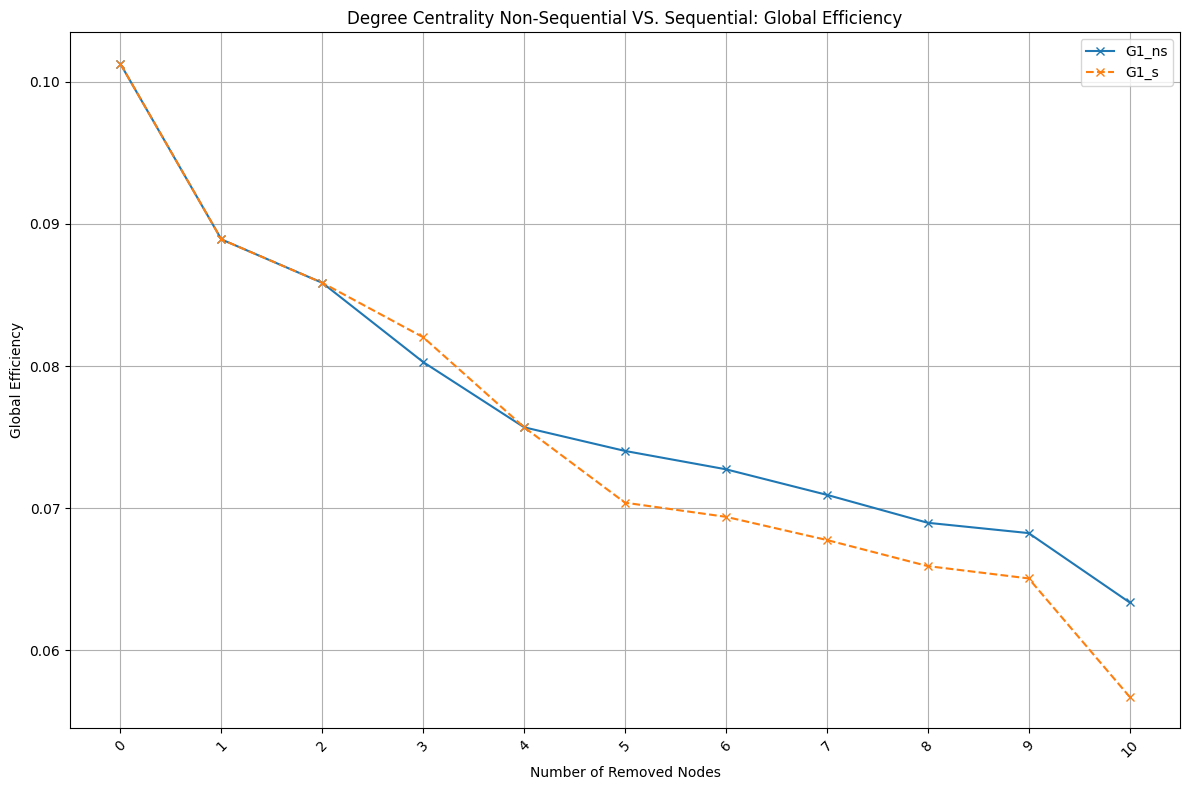

In [ ]:
# Global Efficiency

plt.figure(figsize=(12, 8))

# Plot the first dataset from results_df1ns
plt.plot(results_df1ns.index, results_df1ns['Global Efficiency'], marker='x', label='G1_ns')
# Plot the second dataset from results_df1s
plt.plot(results_df1s.index, results_df1s['Global Efficiency'], marker='x', linestyle='--', label='G1_s')


# Adding labels and title
plt.title('Degree Centrality Non-Sequential VS. Sequential: Global Efficiency')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.xticks(results_df1ns.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()


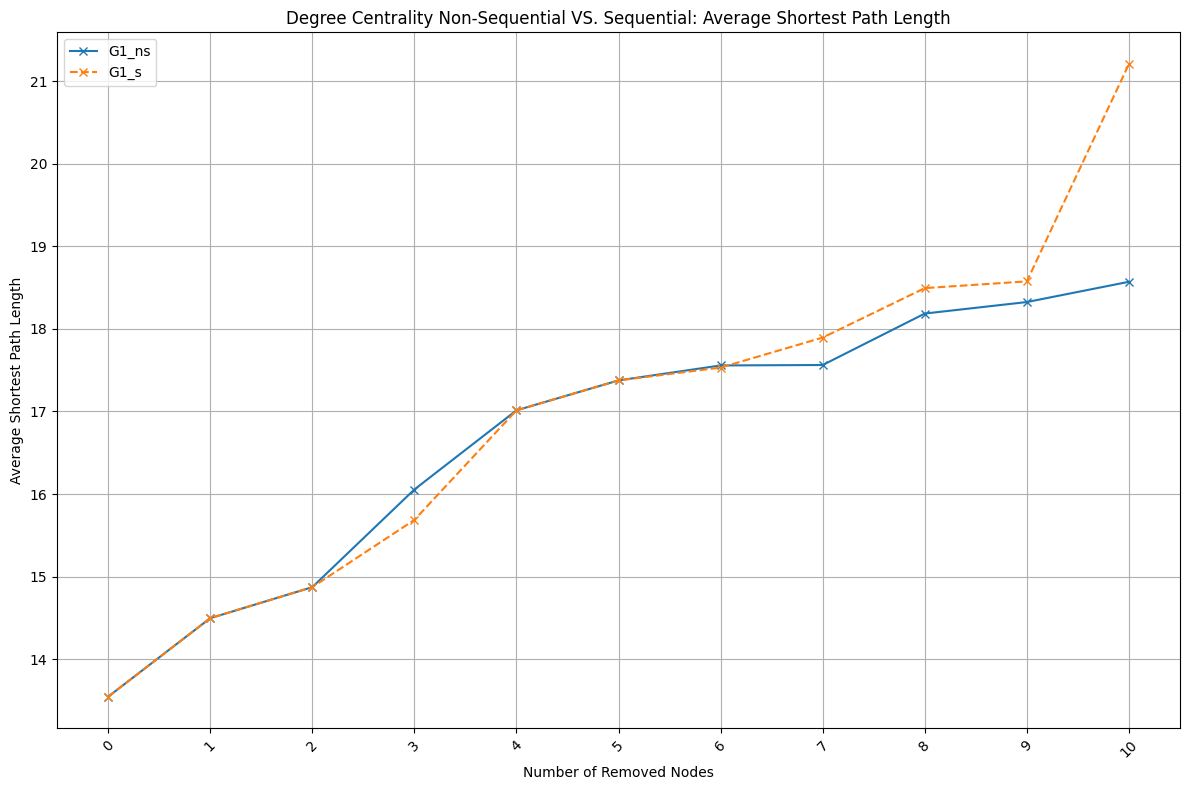

In [ ]:
# Average Shortest Path Length

plt.figure(figsize=(12, 8))

# Plot the first dataset
plt.plot(results_df1ns.index, results_df1ns['Average Shortest Path Length'], marker='x', label='G1_ns')
# Plot the second dataset from results_df2ns
plt.plot(results_df1s.index, results_df1s['Average Shortest Path Length'], marker='x', linestyle='--', label='G1_s')


# Adding labels and title
plt.title('Degree Centrality Non-Sequential VS. Sequential: Average Shortest Path Length')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Average Shortest Path Length')
plt.xticks(results_df1s.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()

**Betweenness Centrality**

Non-Sequential

In [ ]:

# Create a sample graph (replace this with your actual graph)
G2_ns = G.copy()

# List of nodes sorted by centrality based on the new values provided
nodes_by_centrality = [
    'Stratford', 'Bank and Monument', 'Liverpool Street',
    'King\'s Cross St. Pancras', 'Waterloo', 'Green Park',
    'Euston', 'Westminster', 'Baker Street', 'Finchley Road'
]

# Store initial global efficiency and initial average shortest path length
efficiencies = [nx.global_efficiency(G2_ns)]
# Calculate ASPL for the largest connected component or set to inf if graph is disconnected
avg_shortest_paths = [nx.average_shortest_path_length(G2_ns) if nx.is_connected(G2_ns) else float('inf')]

for node in nodes_by_centrality:
    G2_ns.remove_node(node)
    eff = nx.global_efficiency(G2_ns)
    efficiencies.append(eff)
    if nx.is_connected(G2_ns):
        aspl = nx.average_shortest_path_length(G2_ns)
    else:
        # Find the largest connected component and calculate its ASPL
        largest_cc = max(nx.connected_components(G2_ns), key=len)  # Get the largest component
        subgraph = G2_ns.subgraph(largest_cc)  # Create a subgraph of the largest component
        aspl = nx.average_shortest_path_length(subgraph) if nx.is_connected(subgraph) else float('inf')
    avg_shortest_paths.append(aspl)

# Convert results to DataFrame for easier visualization
results_df2ns = pd.DataFrame({
    'Removed Station': ['Initial'] + nodes_by_centrality,
    'Global Efficiency': efficiencies,
    'Average Shortest Path Length': avg_shortest_paths
})

print(results_df2ns)


             Removed Station  Global Efficiency  Average Shortest Path Length
0                    Initial           0.101256                     13.545998
1                  Stratford           0.088917                     14.496447
2          Bank and Monument           0.085862                     14.872497
3           Liverpool Street           0.084963                     15.031209
4   King's Cross St. Pancras           0.078498                     16.030742
5                   Waterloo           0.075942                     16.756742
6                 Green Park           0.074152                     17.180865
7                     Euston           0.068206                     16.807372
8                Westminster           0.067660                     16.975059
9               Baker Street           0.064700                     17.586339
10             Finchley Road           0.063139                     17.986979


Sequential

In [ ]:

# Create a sample graph (replace this with your actual graph)
G2_s = G.copy()

# Initialize lists to store results
removed_nodes = []
efficiencies = [nx.global_efficiency(G2_s)]
avg_shortest_paths = [nx.average_shortest_path_length(G2_s) if nx.is_connected(G2_s) else float('inf')]

# Perform the node removal process
for _ in range(10):
    # Calculate betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G2_s)
    # Find the node with the highest betweenness centrality
    node_to_remove = max(betweenness_centrality, key=betweenness_centrality.get)
    removed_nodes.append(node_to_remove)
    # Remove the node with the highest betweenness centrality
    G2_s.remove_node(node_to_remove)

    # Recalculate global efficiency
    eff = nx.global_efficiency(G2_s)
    efficiencies.append(eff)

    # Recalculate ASPL for the largest connected component or set to inf if graph is disconnected
    if nx.is_connected(G2_s):
        aspl = nx.average_shortest_path_length(G2_s)
    else:
        largest_cc = max(nx.connected_components(G2_s), key=len)  # Get the largest component
        subgraph = G2_s.subgraph(largest_cc)  # Create a subgraph of the largest component
        aspl = nx.average_shortest_path_length(subgraph) if nx.is_connected(subgraph) else float('inf')
    avg_shortest_paths.append(aspl)

# Convert results to DataFrame for easier visualization
results_df2s = pd.DataFrame({
    'Removed Node': ['Initial'] + removed_nodes,
    'Global Efficiency': efficiencies,
    'Average Shortest Path Length': avg_shortest_paths
})

print(results_df2s)


                Removed Node  Global Efficiency  Average Shortest Path Length
0                    Initial           0.101256                     13.545998
1                  Stratford           0.088917                     14.496447
2   King's Cross St. Pancras           0.084603                     15.310134
3                   Waterloo           0.081829                     15.795939
4          Bank and Monument           0.077678                     16.789631
5               Canada Water           0.072832                     19.029234
6             West Hampstead           0.053210                     13.462360
7               Earl's Court           0.051656                     14.206450
8            Shepherd's Bush           0.045844                     13.792046
9                     Euston           0.041631                     13.821885
10              Baker Street           0.038164                     18.193596


Non-Sequential VS. Sequential

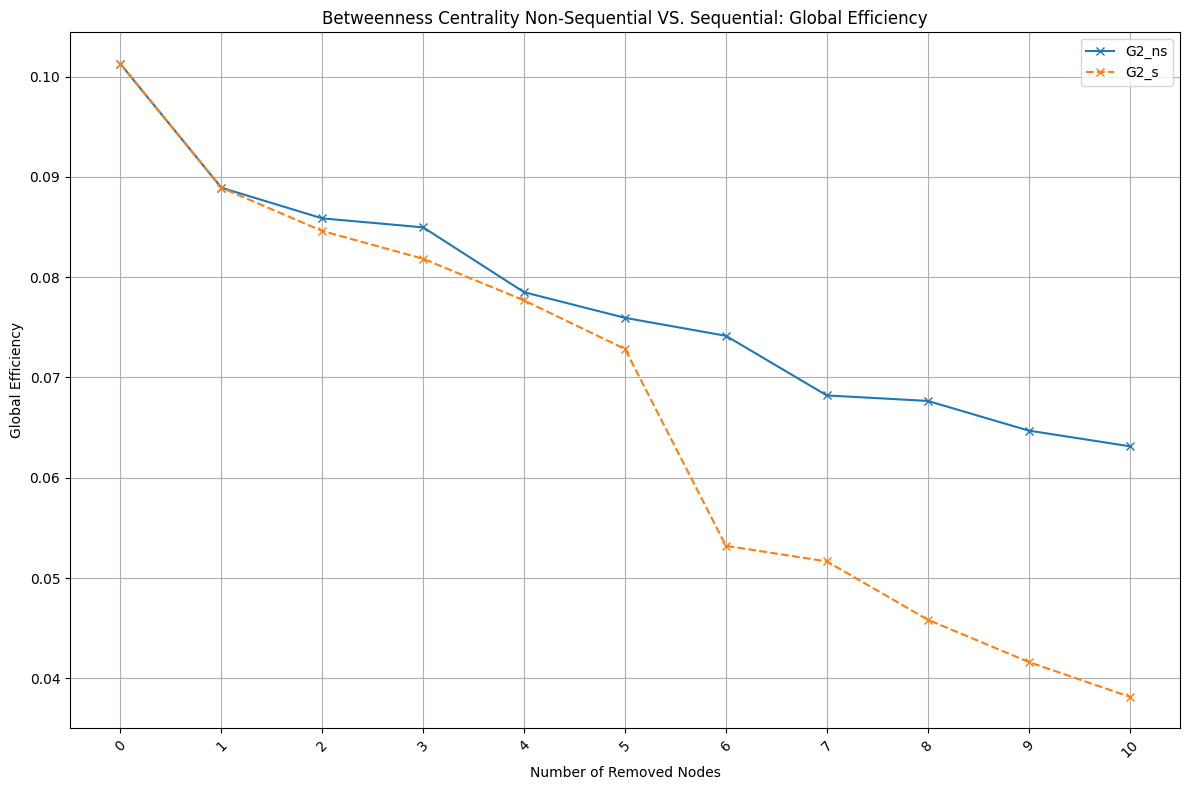

In [ ]:
# Global Efficiency

plt.figure(figsize=(12, 8))

# Plot the first dataset
plt.plot(results_df1ns.index, results_df2ns['Global Efficiency'], marker='x', label='G2_ns')
# Plot the second dataset from results_df2ns
plt.plot(results_df1s.index, results_df2s['Global Efficiency'], marker='x', linestyle='--', label='G2_s')


# Adding labels and title
plt.title('Betweenness Centrality Non-Sequential VS. Sequential: Global Efficiency')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.xticks(results_df2s.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()


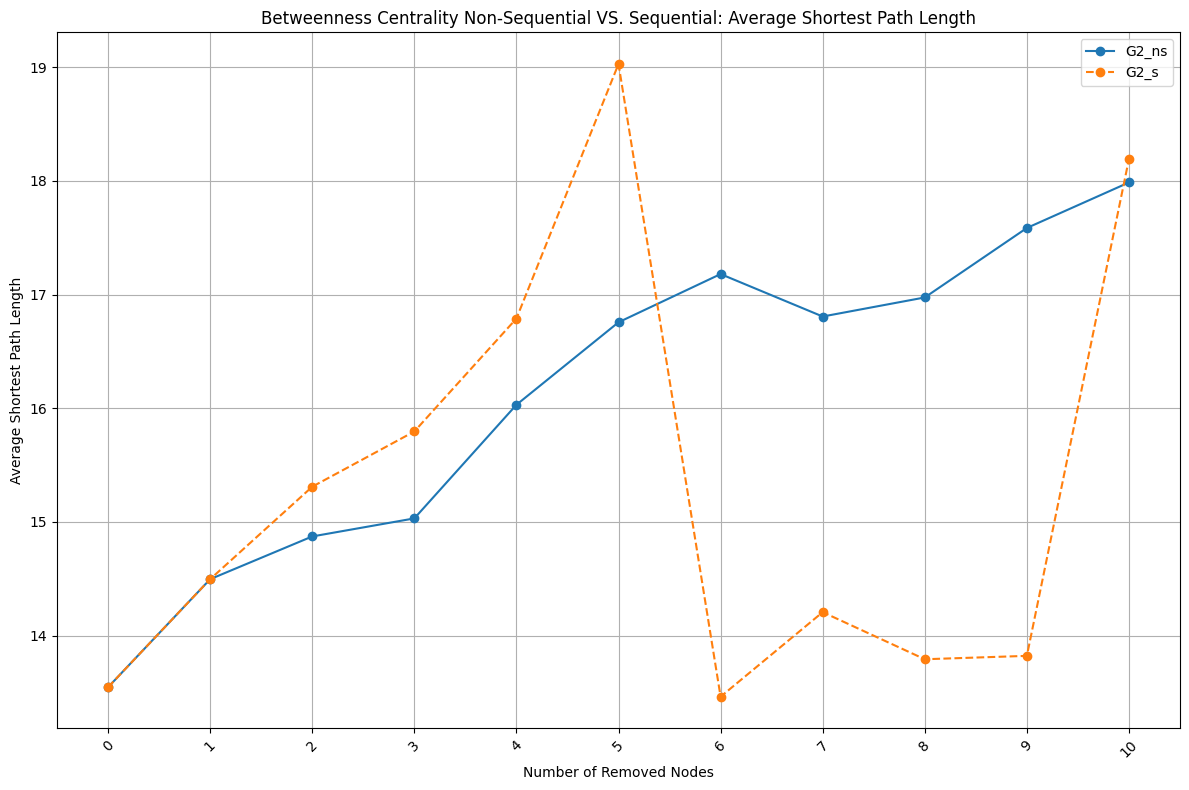

In [ ]:
# Average Shortest Path Length

plt.figure(figsize=(12, 8))

# Plot the first dataset
plt.plot(results_df2ns.index, results_df2ns['Average Shortest Path Length'], marker='o', label='G2_ns')
# Plot the second dataset from results_df2ns
plt.plot(results_df2s.index, results_df2s['Average Shortest Path Length'], marker='o', linestyle='--', label='G2_s')


# Adding labels and title
plt.title('Betweenness Centrality Non-Sequential VS. Sequential: Average Shortest Path Length')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Average Shortest Path Length')
plt.xticks(results_df2s.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()

**Closeness Centrality**

Non-Sequential

In [ ]:

# Create a sample graph (replace this with your actual graph)
G3_ns = G.copy()

# List of nodes sorted by centrality
nodes_by_centrality = ['Green Park', 'Bank and Monument', 'King\'s Cross St. Pancras', 'Westminster',
                       'Waterloo', 'Oxford Circus', 'Bond Street', 'Farringdon', 'Angel', 'Moorgate']

# Store initial global efficiency and initial average shortest path length
efficiencies = [nx.global_efficiency(G3_ns)]
# Calculate ASPL for the largest connected component or set to inf if graph is disconnected
avg_shortest_paths = [nx.average_shortest_path_length(G3_ns) if nx.is_connected(G3_ns) else float('inf')]

for node in nodes_by_centrality:
    G3_ns.remove_node(node)
    eff = nx.global_efficiency(G3_ns)
    efficiencies.append(eff)
    if nx.is_connected(G3_ns):
        aspl = nx.average_shortest_path_length(G3_ns)
    else:
        # Find the largest connected component and calculate its ASPL
        largest_cc = max(nx.connected_components(G3_ns), key=len)  # Get the largest component
        subgraph = G3_ns.subgraph(largest_cc)  # Create a subgraph of the largest component
        aspl = nx.average_shortest_path_length(subgraph) if nx.is_connected(subgraph) else float('inf')
    avg_shortest_paths.append(aspl)

# Convert results to DataFrame for easier visualization
results_df3ns = pd.DataFrame({
    'Removed Station': ['Initial'] + nodes_by_centrality,
    'Global Efficiency': efficiencies,
    'Average Shortest Path Length': avg_shortest_paths
})

print(results_df3ns)


             Removed Station  Global Efficiency  Average Shortest Path Length
0                    Initial           0.101256                     13.545998
1                 Green Park           0.099190                     13.824536
2          Bank and Monument           0.094872                     14.382728
3   King's Cross St. Pancras           0.087934                     15.983773
4                Westminster           0.087372                     16.080248
5                   Waterloo           0.084859                     16.855722
6              Oxford Circus           0.082781                     17.431832
7                Bond Street           0.082581                     17.464267
8                 Farringdon           0.082600                     17.462494
9                      Angel           0.082622                     17.460528
10                  Moorgate           0.081670                     17.473922


Sequential

In [ ]:

# Create a sample graph (replace this with your actual graph)
G3_s = G.copy()

# Initialize lists to store results
removed_nodes = []
efficiencies = [nx.global_efficiency(G3_s)]
avg_shortest_paths = [nx.average_shortest_path_length(G3_s) if nx.is_connected(G3_s) else float('inf')]

# Perform the node removal process
for _ in range(10):
    # Calculate closeness centrality
    closeness_centrality = nx.closeness_centrality(G3_s)
    # Find the node with the highest closeness centrality
    node_to_remove = max(closeness_centrality, key=closeness_centrality.get)
    removed_nodes.append(node_to_remove)
    # Remove the node with the highest closeness centrality
    G3_s.remove_node(node_to_remove)

    # Recalculate global efficiency
    eff = nx.global_efficiency(G3_s)
    efficiencies.append(eff)

    # Recalculate ASPL for the largest connected component or set to inf if graph is disconnected
    if nx.is_connected(G3_s):
        aspl = nx.average_shortest_path_length(G3_s)
    else:
        largest_cc = max(nx.connected_components(G3_s), key=len)  # Get the largest component
        subgraph = G3_s.subgraph(largest_cc)  # Create a subgraph of the largest component
        aspl = nx.average_shortest_path_length(subgraph) if nx.is_connected(subgraph) else float('inf')
    avg_shortest_paths.append(aspl)

# Convert results to DataFrame for easier visualization
results_df3s = pd.DataFrame({
    'Removed Node': ['Initial'] + removed_nodes,
    'Global Efficiency': efficiencies,
    'Average Shortest Path Length': avg_shortest_paths
})

print(results_df3s)


                Removed Node  Global Efficiency  Average Shortest Path Length
0                    Initial           0.101256                     13.545998
1                 Green Park           0.099190                     13.824536
2   King's Cross St. Pancras           0.094435                     14.658480
3                   Waterloo           0.091816                     15.114818
4          Bank and Monument           0.085426                     16.702427
5             West Hampstead           0.080544                     18.974696
6               Canada Water           0.058101                     13.978014
7                  Stratford           0.051884                     13.978014
8               Earl's Court           0.050350                     14.729722
9            Shepherd's Bush           0.044395                     14.747608
10             Oxford Circus           0.042958                     15.661877


Non-Sequential VS. Sequential

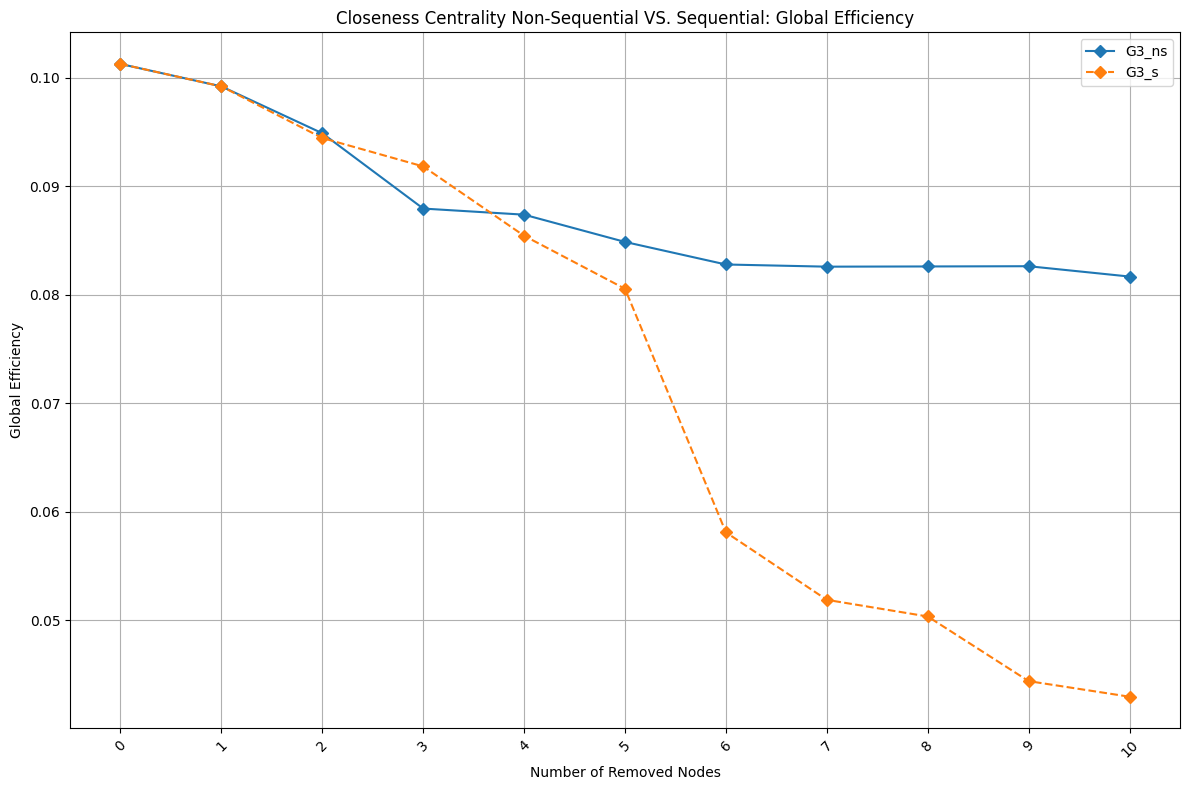

In [ ]:
# Global Efficiency

plt.figure(figsize=(12, 8))

# Plot the first dataset
plt.plot(results_df3ns.index, results_df3ns['Global Efficiency'], marker='D', label='G3_ns')
# Plot the second dataset from results_df2ns
plt.plot(results_df3s.index, results_df3s['Global Efficiency'], marker='D', linestyle='--', label='G3_s')


# Adding labels and title
plt.title('Closeness Centrality Non-Sequential VS. Sequential: Global Efficiency')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.xticks(results_df3s.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()


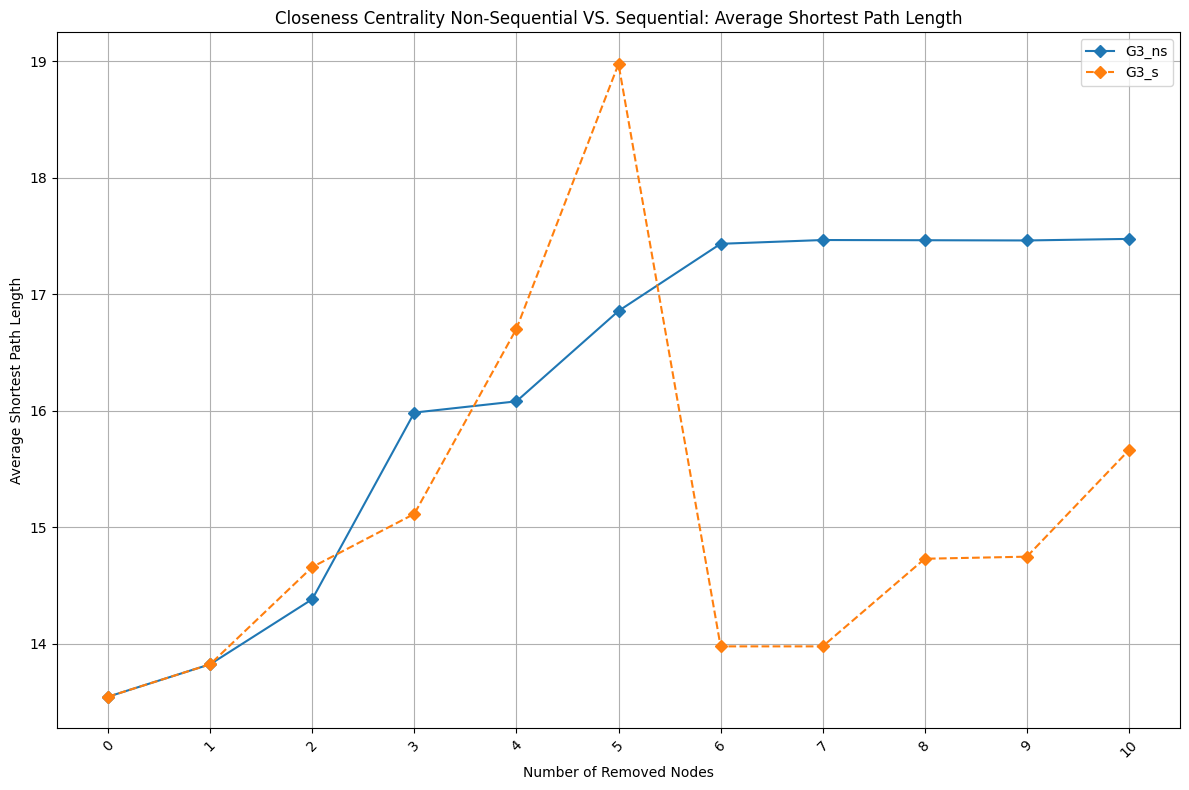

In [ ]:
# Average Shortest Path Length

plt.figure(figsize=(12, 8))

# Plot the first dataset
plt.plot(results_df3ns.index, results_df3ns['Average Shortest Path Length'], marker='D', label='G3_ns')
# Plot the second dataset from results_df2ns
plt.plot(results_df3s.index, results_df3s['Average Shortest Path Length'], marker='D', linestyle='--', label='G3_s')


# Adding labels and title
plt.title('Closeness Centrality Non-Sequential VS. Sequential: Average Shortest Path Length')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Average Shortest Path Length')
plt.xticks(results_df3s.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()


**All in 1**

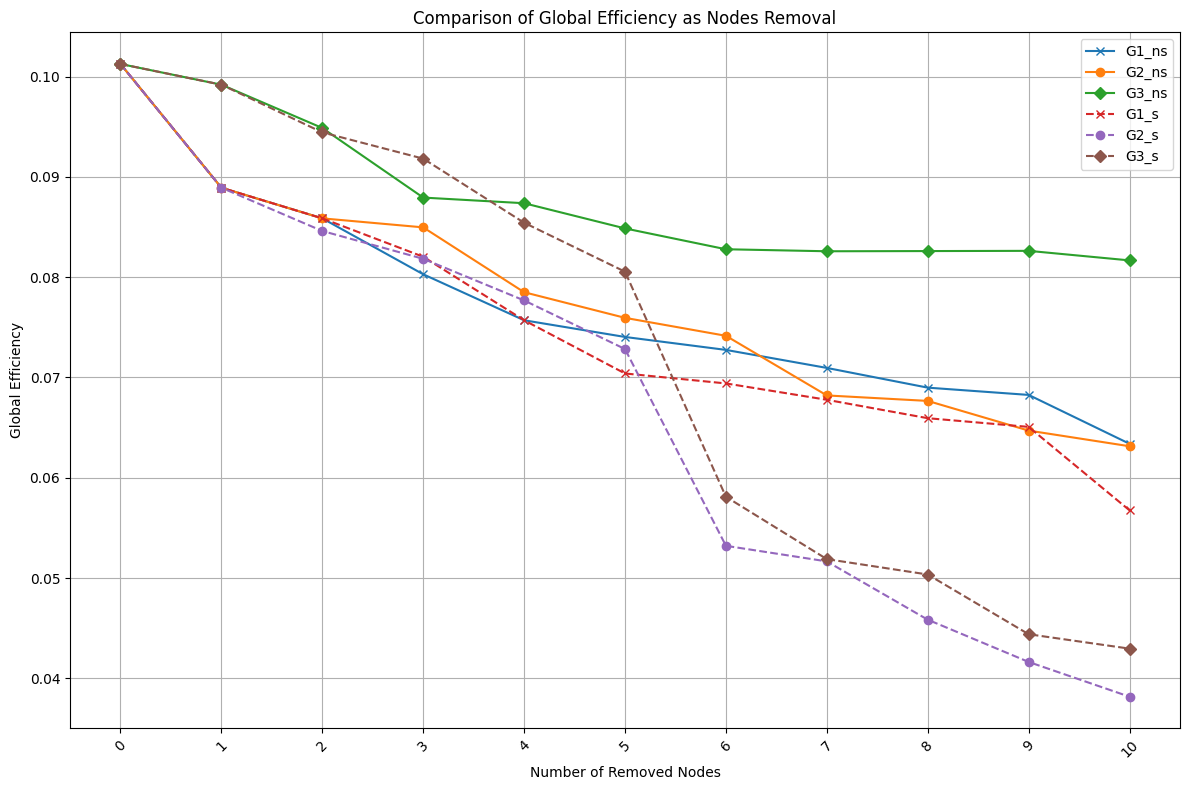

In [ ]:
# Global Efficiency

plt.figure(figsize=(12, 8))

# Plot the first dataset
plt.plot(results_df1ns.index, results_df1ns['Global Efficiency'], marker='x', label='G1_ns')
# Plot the second dataset from results_df2ns
plt.plot(results_df2ns.index, results_df2ns['Global Efficiency'], marker='o',  label='G2_ns')
# Plot the second dataset from results_df3ns
plt.plot(results_df3ns.index, results_df3ns['Global Efficiency'], marker='D',  label='G3_ns')
# Plot the first dataset
plt.plot(results_df1s.index, results_df1s['Global Efficiency'], marker='x', linestyle='--', label='G1_s')
# Plot the second dataset from results_df2ns
plt.plot(results_df2s.index, results_df2s['Global Efficiency'], marker='o', linestyle='--', label='G2_s')
# Plot the second dataset from results_df3ns
plt.plot(results_df3s.index, results_df3s['Global Efficiency'], marker='D', linestyle='--', label='G3_s')

# Adding labels and title
plt.title('Comparison of Global Efficiency as Nodes Removal')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Global Efficiency')
plt.xticks(results_df1s.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()


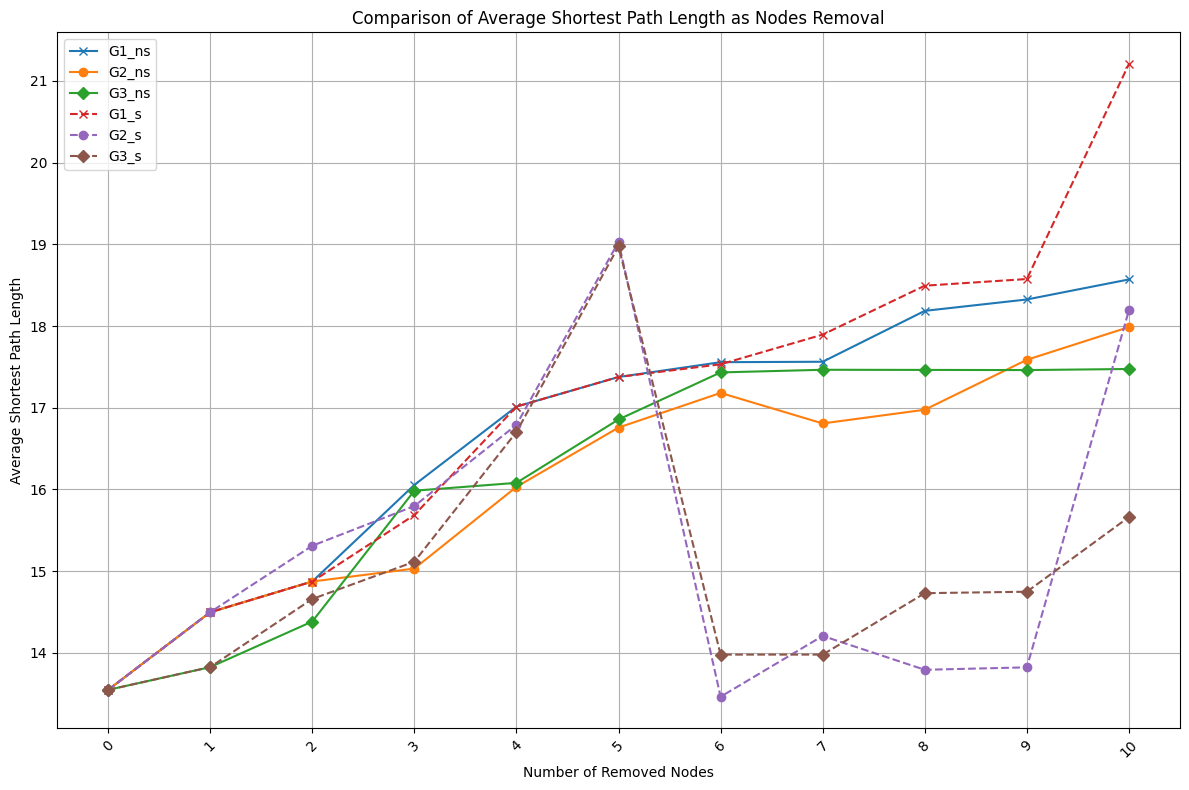

In [ ]:
# Average Shortest Path Length

plt.figure(figsize=(12, 8))

# Plot the first dataset
plt.plot(results_df1ns.index, results_df1ns['Average Shortest Path Length'], marker='x', label='G1_ns')
# Plot the second dataset from results_df2ns
plt.plot(results_df2ns.index, results_df2ns['Average Shortest Path Length'], marker='o',  label='G2_ns')
# Plot the second dataset from results_df3ns
plt.plot(results_df3ns.index, results_df3ns['Average Shortest Path Length'], marker='D',  label='G3_ns')
# Plot the first dataset
plt.plot(results_df1s.index, results_df1s['Average Shortest Path Length'], marker='x', linestyle='--', label='G1_s')
# Plot the second dataset from results_df2ns
plt.plot(results_df2s.index, results_df2s['Average Shortest Path Length'], marker='o', linestyle='--', label='G2_s')
# Plot the second dataset from results_df3ns
plt.plot(results_df3s.index, results_df3s['Average Shortest Path Length'], marker='D', linestyle='--', label='G3_s')

# Adding labels and title
plt.title('Comparison of Average Shortest Path Length as Nodes Removal')
plt.xlabel('Number of Removed Nodes')
plt.ylabel('Average Shortest Path Length')
plt.xticks(results_df1ns.index, labels=[0] + list(range(1, len(nodes_by_centrality) + 1)), rotation=45)  # Adjust x-ticks

# Adding legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Tight layout to adjust plotting parameters
plt.tight_layout()

# Display the plot
plt.show()


# II.Flows: weighted network

## II.1.Old vs new measure

In [10]:
# topo betweenness centrality
bet_london_t =nx.betweenness_centrality(G, normalized= True)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

,betweenness_t
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


In [11]:
### Weighted betweenness centrality

G_w2 = G.copy()

#Invert weights
for u, v, d in G_w2.edges(data=True):
    d['flows_inv'] =  1 / (d.get('flows', 0) + .001)

#Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(G_w2,weight='flows_inv',normalized= True)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G_w2,bet_london_w,'betweenness_w')

In [12]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G_w2.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G_w2, 'betweenness_w'))

df_weighted_betweeness = df.sort_values(["betweenness_w"], ascending=False)
df_weighted_betweeness[0:10]

,betweenness_w
Green Park,0.572556
Bank and Monument,0.505288
Waterloo,0.416429
Westminster,0.381366
Liverpool Street,0.336817
Stratford,0.331291
Bond Street,0.291830
Euston,0.284236
Oxford Circus,0.270764
Warren Street,0.254286


In [6]:
#Weighted closeness centrality:
G_w1 = G.copy()


clos_w=nx.closeness_centrality(G_w1, distance='flows_inv')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G_w1,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G_w1.nodes())
df['closeness_w'] = pd.Series(nx.get_node_attributes(G_w1, 'closeness_w'))

df_weighted_closeness = df.sort_values(["closeness_w"], ascending=False)
df_weighted_closeness[0:10]

,closeness_w
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


## II.2.Impact measure with flows

## III.3.Experiment with flows

**Non-sequential**

In [ ]:


# 假设你已经有一个图 G
Gbw_ns = G.copy()

# 按中心性排序的节点列表
nodes_by_centrality = ['Green Park', 'Bank and Monument', 'Waterloo']

# 计算初始的加权全局效率
def weighted_global_efficiency(G):
    n = len(G)
    distances = dict(nx.all_pairs_dijkstra_path_length(G, weight='flows_inv'))
    efficiency = 0
    count = 0
    for u in G:
        for v in G:
            if u != v:
                if distances[u][v] > 0:
                    efficiency += 1 / distances[u][v]
                    count += 1
    return efficiency / count if count > 0 else 0

efficiencies = [weighted_global_efficiency(Gbw_ns)]

# 初始加权平均最短路径长度
weighted_aspl = [nx.average_shortest_path_length(Gbw_ns, weight='flows_inv') if nx.is_connected(Gbw_ns) else float('inf')]

for node in nodes_by_centrality:
    # 移除一个节点
    Gbw_ns.remove_node(node)
    # 计算当前图的加权全局效率
    efficiency = weighted_global_efficiency(Gbw_ns)
    efficiencies.append(efficiency)

    # 如果图仍然连通，计算加权平均最短路径长度
    if nx.is_connected(Gbw_ns):
        waspl = nx.average_shortest_path_length(Gbw_ns, weight='flows_inv')
    else:
        # 寻找最大连通组件并计算其加权平均最短路径长度
        largest_cc = max(nx.connected_components(Gbw_ns), key=len)
        subgraph = Gbw_ns.subgraph(largest_cc)
        waspl = nx.average_shortest_path_length(subgraph, weight='flows_inv') if nx.is_connected(subgraph) else float('inf')
    weighted_aspl.append(waspl)

# 将结果转换为 DataFrame 以便于查看
results_dfbwns = pd.DataFrame({
    'Removed Station': ['Initial'] + nodes_by_centrality,
    'Weighted Global Efficiency': efficiencies,
    'Average Weighted Path Length': weighted_aspl
})

print(results_dfbwns)


     Removed Station  Weighted Global Efficiency  Average Weighted Path Length
0            Initial                    0.101256                     13.545998
1         Green Park                    0.099190                     13.824536
2  Bank and Monument                    0.094872                     14.382728
3           Waterloo                    0.093323                     14.672797


**sequential**

In [16]:

# 创建样本图（使用你实际的图替换此处）
Gbw_s = G.copy()

# 初始化列表以存储结果
removed_nodes = []
# 初始图的加权全球效率
initial_efficiency = nx.global_efficiency(Gbw_s)
efficiencies = [initial_efficiency]
avg_shortest_paths = [nx.average_shortest_path_length(Gbw_s, weight='flows_inv') if nx.is_connected(Gbw_s) else float('inf')]

# 执行节点移除过程
for _ in range(3):
    # 计算介数中心性
    betweenness_centrality = nx.betweenness_centrality(Gbw_s, weight='flows_inv')
    # 找到具有最高介数中心性的节点
    node_to_remove = max(betweenness_centrality, key=betweenness_centrality.get)
    removed_nodes.append(node_to_remove)
    # 移除具有最高介数中心性的节点
    Gbw_s.remove_node(node_to_remove)

    # 重新计算加权全球效率
    if nx.is_connected(Gbw_s):
        eff = nx.global_efficiency(Gbw_s)
    else:
        largest_cc = max(nx.connected_components(Gbw_s), key=len)  # 获取最大连通组件
        subgraph = Gbw_s.subgraph(largest_cc)  # 创建最大连通组件的子图
        eff = nx.global_efficiency(subgraph)  # 计算最大连通组件的全球效率
    efficiencies.append(eff)

    # 重新计算最大连通组件的加权平均最短路径长度
    if nx.is_connected(Gbw_s):
        aspl = nx.average_shortest_path_length(Gbw_s, weight='flows_inv')
    else:
        subgraph = Gbw_s.subgraph(largest_cc)
        aspl = nx.average_shortest_path_length(subgraph, weight='flows_inv') if nx.is_connected(subgraph) else float('inf')
    avg_shortest_paths.append(aspl)

# 转换结果到DataFrame以便更容易的可视化
results_dfbws = pd.DataFrame({
    'Removed Node': ['Initial'] + removed_nodes,
    'Weighted Global Efficiency': efficiencies,
    'Average Shortest Path Length': avg_shortest_paths
})

print(results_dfbws)


               Removed Node  Weighted Global Efficiency  \
0                   Initial                    0.101256   
1                 Stratford                    0.098215   
2  King's Cross St. Pancras                    0.093431   
3                  Waterloo                    0.090360   

   Average Shortest Path Length  
0                     13.545998  
1                     14.496447  
2                     15.310134  
3                     15.795939  


VS

In [19]:
import pandas as pd

# 先前的结果
data1 = {
    'Removed Station': ['Initial', 'Stratford', "King's Cross St. Pancras", 'Waterloo'],
    'Weighted Global Efficiency': [0.101256, 0.098215, 0.093431, 0.090360],
    'Average Weighted Path Length': [13.545998, 14.496447, 15.310134, 15.795939]
}

df1 = pd.DataFrame(data1)

# 新的结果
data2 = {
    'Removed Station': ['Initial', 'Green Park', 'Bank and Monument', 'Waterloo'],
    'Weighted Global Efficiency': [0.101256, 0.099190, 0.094872, 0.093323],
    'Average Weighted Path Length': [13.545998, 13.824536, 14.382728, 14.672797]
}

df2 = pd.DataFrame(data2)


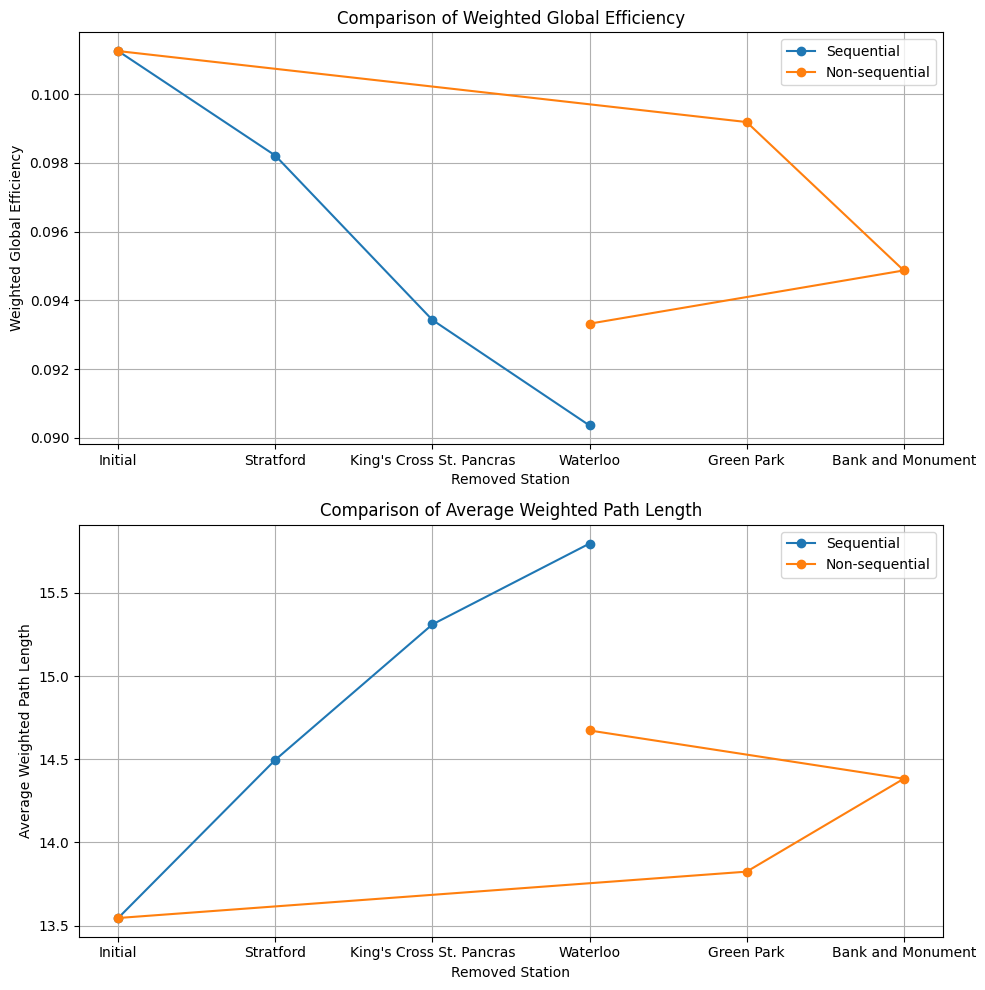

In [21]:
import matplotlib.pyplot as plt

# 绘制图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# 加权全球效率对比
ax1.plot(df1['Removed Station'], df1['Weighted Global Efficiency'], label='Sequential', marker='o')
ax1.plot(df2['Removed Station'], df2['Weighted Global Efficiency'], label='Non-sequential', marker='o')
ax1.set_title('Comparison of Weighted Global Efficiency')
ax1.set_xlabel('Removed Station')
ax1.set_ylabel('Weighted Global Efficiency')
ax1.legend()
ax1.grid(True)

# 平均加权路径长度对比
ax2.plot(df1['Removed Station'], df1['Average Weighted Path Length'], label='Sequential', marker='o')
ax2.plot(df2['Removed Station'], df2['Average Weighted Path Length'], label='Non-sequential', marker='o')
ax2.set_title('Comparison of Average Weighted Path Length')
ax2.set_xlabel('Removed Station')
ax2.set_ylabel('Average Weighted Path Length')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


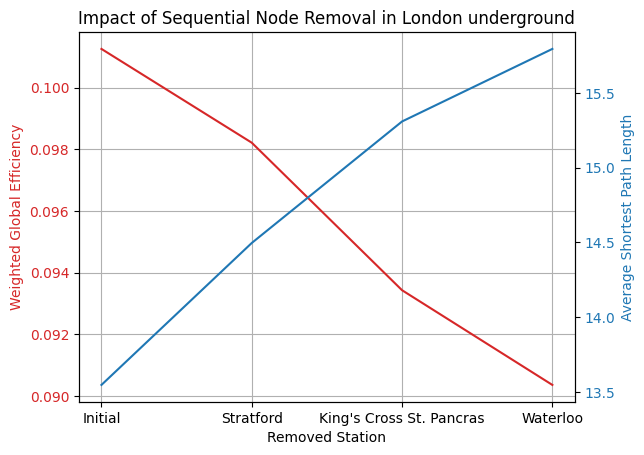

In [26]:

# 假设已有的数据
removed_nodes = ['Initial', 'Stratford', "King's Cross St. Pancras", 'Waterloo']
efficiencies = [0.101256, 0.098215, 0.093431, 0.090360]
avg_shortest_paths = [13.545998, 14.496447, 15.310134, 15.795939]

# 创建图表
fig, ax1 = plt.subplots()

# 创建加权全球效率的折线图
color = 'tab:red'
ax1.set_xlabel('Removed Station')
ax1.set_ylabel('Weighted Global Efficiency', color=color)
ax1.plot(removed_nodes, efficiencies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建一个共享x轴的第二个坐标轴来绘制平均最短路径长度
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Shortest Path Length', color=color)
ax2.plot(removed_nodes, avg_shortest_paths, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加图表标题和网格
plt.title('Impact of Sequential Node Removal in London underground')
ax1.grid(True)

# 显示图表
plt.show()


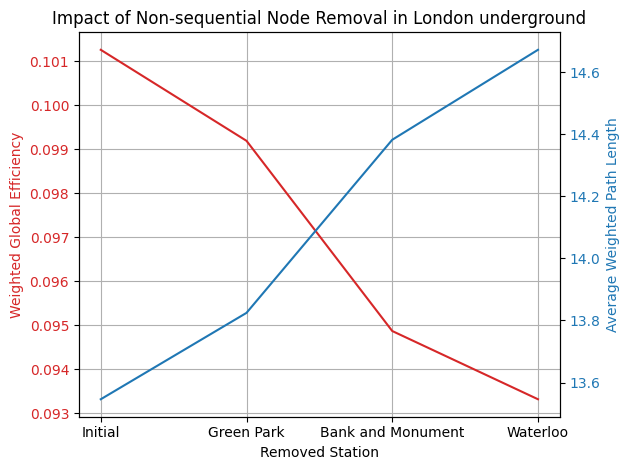

In [25]:
# 使用提供的数据创建DataFrame
df = pd.DataFrame({
    'Removed Station': ['Initial', 'Green Park', 'Bank and Monument', 'Waterloo'],
    'Weighted Global Efficiency': [0.101256, 0.099190, 0.094872, 0.093323],
    'Average Weighted Path Length': [13.545998, 13.824536, 14.382728, 14.672797]
})

# 创建图表
fig, ax1 = plt.subplots()

# 创建加权全球效率的折线图
color = 'tab:red'
ax1.set_xlabel('Removed Station')
ax1.set_ylabel('Weighted Global Efficiency', color=color)
ax1.plot(df['Removed Station'], df['Weighted Global Efficiency'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建一个共享x轴的第二个坐标轴来绘制平均加权路径长度
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Weighted Path Length', color=color)
ax2.plot(df['Removed Station'], df['Average Weighted Path Length'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加图表标题和网格
plt.title('Impact of Non-sequential Node Removal in London underground')
ax1.grid(True)

# 显示图表
plt.tight_layout()
plt.show()


# ***Part 2: Spatial Interaction models***

##III.Models and calibration

**III.1.Spatial interaction models**

**III.2.Calibration of model**

In [ ]:
#Reading in flows
data = pd.read_csv("/content/drive/MyDrive/london_flows.csv")

In [ ]:
# check csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [ ]:
# define r^2 and RMSE calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2

    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""

    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)

    return RMSE

In [ ]:
# Add a small number to 'jobs' to avoid division by zero error
data['jobs_plus_small_number'] = data['jobs'] + .0001
# Calculate the log of the destination employment count
data['log_dest_jobs'] = np.log(data['jobs_plus_small_number'])

#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_dest_jobs + distance -1'

#run a production constrained sim
prodsim = smf.glm(formula = formula, data=data, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodsim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61073
Model Family:                 Poisson   Df Model:                          400
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.2195e+05
Date:                Sat, 27 Apr 2024   Deviance:                   1.6717e+06
Time:                        23:46:28   Pearson chi2:                 2.42e+06
No. Iterations:                    26   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
#Generate Predictions and add to flows dataframe
flows["flows_formula"] = np.round(formula.mu)

#Summary Statistics
print("RSquared =")
print(CalcRSqaured(flows["flows"], flows["flows_formula"]))
print("RMSE =")
print(CalcRMSE(flows["flows"], flows["flows_formula"]))

AttributeError: 'str' object has no attribute 'mu'

In [ ]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take flows ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )

In [ ]:
# Now we want to fish the coefficients out of the prodsim glm object.
coefs = pd.DataFrame(prodsim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "",regex=True)
coefs
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
data.head()


,station_origin,station_destination,flows,population,jobs,distance,jobs_plus_small_number,log_dest_jobs,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,78549.0001,11.271478,599,78549,-2.88102
1,Abbey Road,Beckton,1,599,442,8510.121774,442.0001,6.091310,599,442,-2.88102
2,Abbey Road,Blackwall,3,599,665,3775.448872,665.0001,6.499787,599,665,-2.88102
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,58772.0001,10.981421,599,58772,-2.88102
4,Abbey Road,Canning Town,37,599,15428,2228.923167,15428.0001,9.643939,599,15428,-2.88102


In [ ]:
alpha_i = prodsim.params[:-2]
gamma = prodsim.params[-2]
beta = - prodsim.params[-1]

In [ ]:
alpha_i

station_origin[Abbey Road]         -2.881020
station_origin[Acton Central]      -1.147701
station_origin[Acton Town]         -1.600210
station_origin[Aldgate]            -2.912648
station_origin[Aldgate East]       -2.824606
                                      ...   
station_origin[Wood Street]        -0.927395
station_origin[Woodford]           -0.628674
station_origin[Woodgrange Park]    -0.881059
station_origin[Woodside Park]      -1.145095
station_origin[Woolwich Arsenal]    0.535723
Length: 399, dtype: float64

In [ ]:
gamma

0.7509082580586228

In [ ]:
beta

0.0001508173899434075

In [ ]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_dest_jobs"]
                                 - data["distance"]*beta)
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
data.head(10)


,station_origin,station_destination,flows,population,jobs,distance,jobs_plus_small_number,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,78549.0001,11.271478,599,78549,-2.88102,77.979883
1,Abbey Road,Beckton,1,599,442,8510.121774,442.0001,6.091310,599,442,-2.88102,1.506096
2,Abbey Road,Blackwall,3,599,665,3775.448872,665.0001,6.499787,599,665,-2.88102,4.180041
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,58772.0001,10.981421,599,58772,-2.88102,99.274151
4,Abbey Road,Canning Town,37,599,15428,2228.923167,15428.0001,9.643939,599,15428,-2.88102,55.954213
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,1208.0001,7.096721,599,1208,-2.88102,4.218714
6,Abbey Road,Custom House,0,599,845,3824.855630,845.0001,6.739337,599,845,-2.88102,4.966669
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,1748.0001,7.466228,599,1748,-2.88102,4.232939
8,Abbey Road,Cyprus,7,599,850,6532.099618,850.0001,6.745236,599,850,-2.88102,3.316400
9,Abbey Road,Devons Road,1,599,611,3958.324171,611.0001,6.415097,599,611,-2.88102,3.815782


In [ ]:
#first round the estimates
data["prodsim"] = round(data["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
datamat1 = data.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
datamat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.618199,5.990000e+02
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.348478,NaN,NaN,1.224000e+03
Acton Town,NaN,NaN,NaN,13.093899,12.806818,NaN,13.623063,0.045719,NaN,16.126685,...,13.496779,2.950864,1.984144,19.531895,NaN,0.239418,NaN,0.564334,NaN,3.745000e+03
Aldgate,NaN,NaN,1.365781,NaN,37.072129,NaN,NaN,0.003808,NaN,27.469639,...,2.177616,NaN,2.563682,2.104543,NaN,0.691297,NaN,0.569466,NaN,2.886000e+03
Aldgate East,NaN,NaN,1.438015,39.907781,NaN,NaN,0.299814,0.004008,NaN,28.914896,...,2.292786,0.501283,2.698565,2.215269,NaN,0.937531,NaN,0.599427,NaN,3.172000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.486101,41.138061,51.826790,NaN,NaN,NaN,NaN,30.466097,...,2.369455,NaN,5.852855,NaN,NaN,NaN,NaN,NaN,NaN,4.868000e+03
Woodgrange Park,NaN,1.063791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000e+02
Woodside Park,NaN,NaN,2.007306,19.419261,18.988530,NaN,0.418506,NaN,NaN,31.480842,...,3.200469,NaN,3.873239,NaN,NaN,NaN,NaN,NaN,NaN,3.093000e+03


In [ ]:
CalcRSqaured(data["flows"], data["prodsimest1"])

0.4482891431291874

In [ ]:
CalcRMSE(data["flows"], data["prodsimest1"])

97.845

**IV.	Scenarios**

**IV.1.Scenario A**

In [ ]:
# create new column with number of jobs
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 0.5*row['jobs']
    else:
        val = row["jobs"]
    return val

data["jobs_scenario_a"] = data.apply(new_job, axis =1)
data.head(10)

,station_origin,station_destination,flows,population,jobs,distance,jobs_plus_small_number,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1,prodsim,jobs_scenario_a
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,78549.0001,11.271478,599,78549,-2.88102,77.979883,78.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,442.0001,6.091310,599,442,-2.88102,1.506096,2.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,665.0001,6.499787,599,665,-2.88102,4.180041,4.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,58772.0001,10.981421,599,58772,-2.88102,99.274151,99.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,15428.0001,9.643939,599,15428,-2.88102,55.954213,56.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,1208.0001,7.096721,599,1208,-2.88102,4.218714,4.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,845.0001,6.739337,599,845,-2.88102,4.966669,5.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,1748.0001,7.466228,599,1748,-2.88102,4.232939,4.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,850.0001,6.745236,599,850,-2.88102,3.316400,3.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,611.0001,6.415097,599,611,-2.88102,3.815782,4.0,611.0


In [ ]:
# check data
df_cw = data[data['station_destination'] == 'Canary Wharf']
df_cw

,station_origin,station_destination,flows,population,jobs,distance,jobs_plus_small_number,log_dest_jobs,O_i,D_j,alpha_i,prodsimest1,prodsim,jobs_scenario_a
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,58772.0001,10.981421,599,58772,-2.881020,99.274151,99.0,29386.0
126,Acton Town,Canary Wharf,57,3745,58772,20398.165882,58772.0001,10.981421,3745,58772,-1.600210,35.496406,35.0,29386.0
348,Aldgate,Canary Wharf,1,2886,58772,6564.419680,58772.0001,10.981421,2886,58772,-2.912648,76.965965,77.0,29386.0
595,Aldgate East,Canary Wharf,3,3172,58772,5127.998899,58772.0001,10.981421,3172,58772,-2.824606,104.380475,104.0,29386.0
817,All Saints,Canary Wharf,67,740,58772,1340.088733,58772.0001,10.981421,740,58772,-2.844356,181.195246,181.0,29386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60595,Wood Green,Canary Wharf,64,6667,58772,16849.246595,58772.0001,10.981421,6667,58772,-1.047702,105.338422,105.0,29386.0
60838,Wood Lane,Canary Wharf,0,1088,58772,17092.091760,58772.0001,10.981421,1088,58772,-3.185040,11.979714,12.0,29386.0
61062,Woodford,Canary Wharf,192,4868,58772,13963.787075,58772.0001,10.981421,4868,58772,-0.628674,247.493439,247.0,29386.0
61294,Woodside Park,Canary Wharf,42,3093,58772,22356.567178,58772.0001,10.981421,3093,58772,-1.145095,41.645167,42.0,29386.0


In [ ]:
# Set parameters
alpha_i = prodsim.params[0:2]
gamma = prodsim.params[-2]
beta = -prodsim.params[-1]

In [ ]:
#calculate some new Dj^gamma and d_ij^beta values
Dj2_gamma = data["jobs_scenario_a"]**gamma
dist_beta = np.exp(data['distance']*-beta)

#calcualte the first stage of the Ai values
data["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [ ]:
#to check everything works, recreate the original estimates
data["prodsimest2"] = data["A_i2"]*data["O_i"]*Dj2_gamma*dist_beta
#round
data["prodsimest2"] = round(data["prodsimest2"])
#check
data[["prodsimest1", "prodsimest2"]]

,prodsimest1,prodsimest2
0,77.979883,84.0
1,1.506096,2.0
2,4.180041,4.0
3,99.274151,63.0
4,55.954213,60.0
...,...,...
61469,100.244543,108.0
61470,295.543285,320.0
61471,36.468910,39.0
61472,125.232204,135.0


In [ ]:
# 预计的matrix
datamat2 = data.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
datamat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,602.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,14.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3746.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2880.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4858.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,534.0
Woodside Park,NaN,NaN,2.0,20.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3098.0


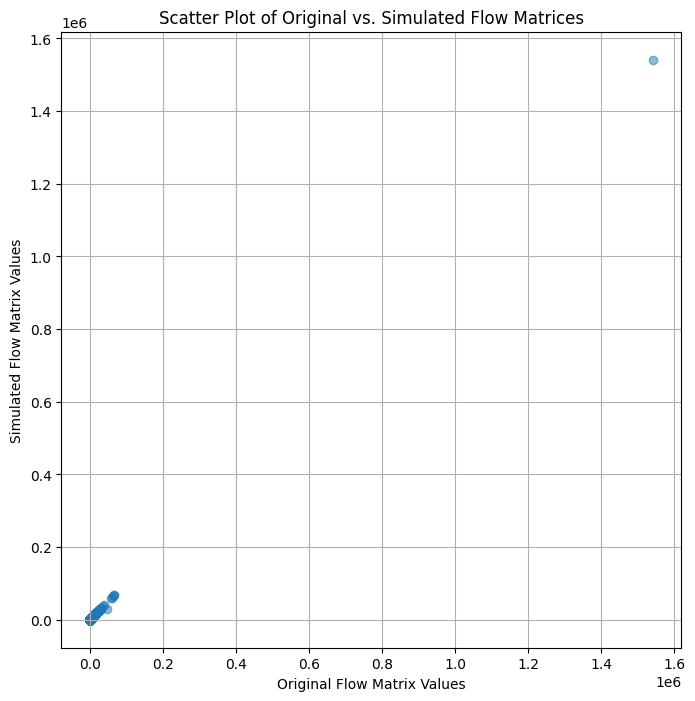

In [ ]:


# 获取底层的NumPy数组并展平
original_flat = datamat1.values.flatten()
simulated_flat = datamat2.values.flatten()


# 绘制散点图
plt.figure(figsize=(8, 8))
plt.scatter(original_flat, simulated_flat, alpha=0.5)
plt.title('Scatter Plot of Original vs. Simulated Flow Matrices')
plt.xlabel('Original Flow Matrix Values')
plt.ylabel('Simulated Flow Matrix Values')

# 绘制y=x参考线，表明完美匹配的位置
plt.plot([0, 100], [0, 100], 'r--', lw=2)

plt.grid(True)
plt.show()

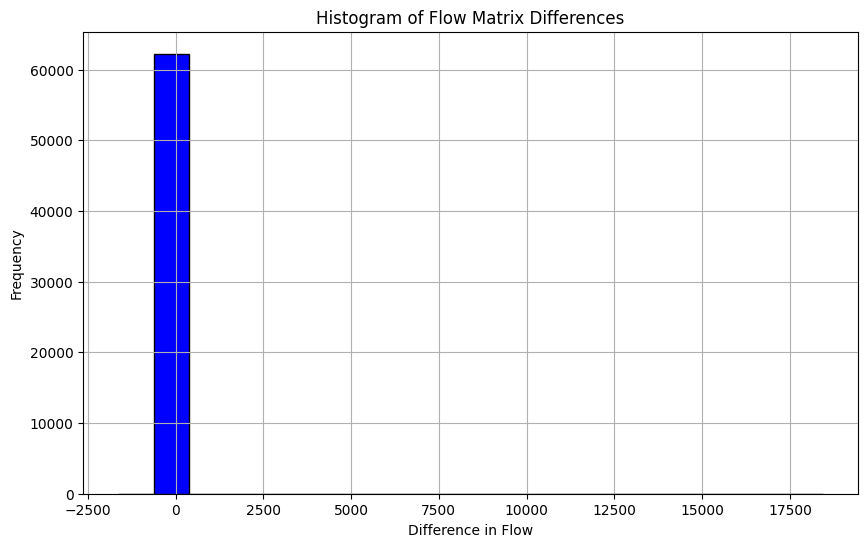

In [ ]:
# 计算差异矩阵
difference1 = datamat1 - datamat2
difference = difference1.values.flatten()
# 绘制差异直方图
plt.figure(figsize=(10, 6))
plt.hist(difference.flatten(), bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Flow Matrix Differences')
plt.xlabel('Difference in Flow')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

负数代表减少了，最常见的差异值似乎接近于零，这表示许多流量值在原始数据和模拟数据之间没有太大变化。

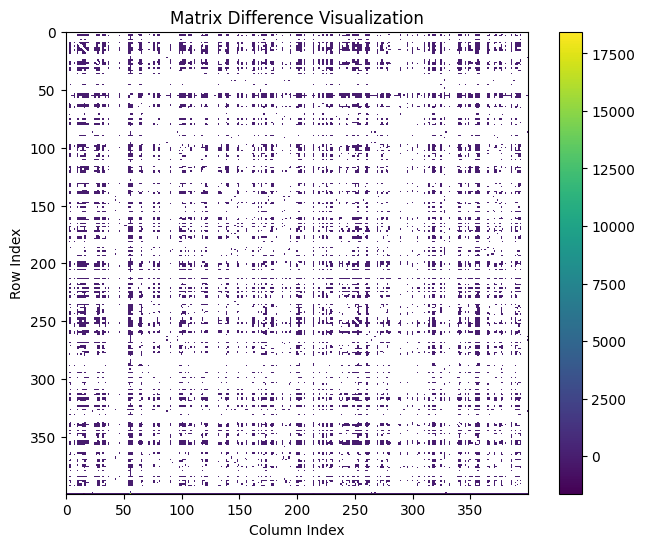

In [ ]:
# 计算两个矩阵的差
difference = datamat1 - datamat2

# 使用matplotlib可视化结果
plt.figure(figsize=(8, 6))
plt.imshow(difference, cmap='viridis')  # 使用色彩映射表 (colormap)，'viridis' 是其中一种
plt.colorbar()  # 显示颜色条
plt.title('Matrix Difference Visualization')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

**IV.2.Scenario B**

In [ ]:
#Establish new value for beta - reflecting cost of travel (in terms of distance)
print("Default Beta: " + str(beta))

#Given that beta is relatively small, I will consider a scenario in which beta is 50% larger and 100% larger from its default value
beta_b1 = beta*2
beta_b2 = beta*3

Default Beta: 0.0001508173899434075


In [ ]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = data["jobs"]**gamma
dist_beta1 = np.exp(data['distance']*(-beta_b1))
dist_beta2 = np.exp(data['distance']*(-beta_b2))
#Recalculate alpha_i for scenario a
data["alpha_i_partial_b1"] = Dj2_gamma * dist_beta1
data["alpha_i_partial_b2"] = Dj2_gamma * dist_beta2

#Sum over all destinations
A_i_b1 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b1"].agg(np.sum))
A_i_b2 = pd.DataFrame(data.groupby(["station_origin"])["alpha_i_partial_b2"].agg(np.sum))

#Divide over 1
A_i_b1["alpha_i_partial_b1"] = 1/A_i_b1["alpha_i_partial_b1"]
A_i_b2["alpha_i_partial_b2"] = 1/A_i_b2["alpha_i_partial_b2"]

#Rename
A_i_b1.rename(columns={"alpha_i_partial_b1":"alpha_i_sec_b1"}, inplace=True)
A_i_b2.rename(columns={"alpha_i_partial_b2":"alpha_i_sec_b2"}, inplace=True)

#and write the A_i values back into the dataframe
data = data.merge(A_i_b1, left_on="station_origin", right_index=True, how="left")
data = data.merge(A_i_b2, left_on="station_origin", right_index=True, how="left")

#Calculate new flows for scenario b1
data["flows_scenario_b1"] = np.round(data["alpha_i_sec_b1"]*data["population"]*Dj2_gamma*dist_beta1)

#Calculate new flows for scenario b2
data["flows_scenario_b2"] = np.round(data["alpha_i_sec_b2"]*data["population"]*Dj2_gamma*dist_beta2)

data.head(30)

,station_origin,station_destination,flows,population,jobs,distance,jobs_plus_small_number,log_dest_jobs,O_i,D_j,...,jobs_scenario_a,Ai1,A_i2,prodsimest2,alpha_i_partial_b1,alpha_i_partial_b2,alpha_i_sec_b1,alpha_i_sec_b2,flows_scenario_b1,flows_scenario_b2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,78549.0001,11.271478,599,78549,...,78549.0,1390.572002,0.0001,84.0,407.929784,119.667812,0.000155,0.000226,38.0,16.0
1,Abbey Road,Beckton,1,599,442,8510.121774,442.0001,6.091310,599,442,...,442.0,26.857377,0.0001,2.0,7.441453,2.061826,0.000155,0.000226,1.0,0.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,665.0001,6.499787,599,665,...,665.0,74.540337,0.0001,4.0,42.179616,23.867883,0.000155,0.000226,4.0,3.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,58772.0001,10.981421,599,58772,...,29386.0,1051.964709,0.0001,63.0,822.024327,381.700088,0.000155,0.000226,76.0,52.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,15428.0001,9.643939,599,15428,...,15428.0,997.800444,0.0001,60.0,712.936906,509.399485,0.000155,0.000226,66.0,69.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,1208.0001,7.096721,599,1208,...,1208.0,75.229986,0.0001,5.0,27.443054,10.010918,0.000155,0.000226,3.0,1.0
6,Abbey Road,Custom House,0,599,845,3824.855630,845.0001,6.739337,599,845,...,845.0,88.567838,0.0001,5.0,49.745203,27.939998,0.000155,0.000226,5.0,4.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,1748.0001,7.466228,599,1748,...,1748.0,75.483651,0.0001,5.0,20.934118,5.805725,0.000155,0.000226,2.0,1.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,850.0001,6.745236,599,850,...,850.0,59.139524,0.0001,4.0,22.081612,8.244869,0.000155,0.000226,2.0,1.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,611.0001,6.415097,599,611,...,611.0,68.044722,0.0001,4.0,37.456529,20.618669,0.000155,0.000226,3.0,3.0


**IV.3. Analysis**

In [ ]:
# All in 1
col_names = ['station_origin', 'station_destination', 'prodsimest1', 'prodsimest2', 'flows_scenario_b1', 'flows_scenario_b2']

data.iloc[:][col_names].head(50)

,station_origin,station_destination,prodsimest1,prodsimest2,flows_scenario_b1,flows_scenario_b2
0,Abbey Road,Bank and Monument,77.979883,84.0,38.0,16.0
1,Abbey Road,Beckton,1.506096,2.0,1.0,0.0
2,Abbey Road,Blackwall,4.180041,4.0,4.0,3.0
3,Abbey Road,Canary Wharf,99.274151,63.0,76.0,52.0
4,Abbey Road,Canning Town,55.954213,60.0,66.0,69.0
5,Abbey Road,Crossharbour,4.218714,5.0,3.0,1.0
6,Abbey Road,Custom House,4.966669,5.0,5.0,4.0
7,Abbey Road,Cutty Sark,4.232939,5.0,2.0,1.0
8,Abbey Road,Cyprus,3.316400,4.0,2.0,1.0
9,Abbey Road,Devons Road,3.815782,4.0,3.0,3.0


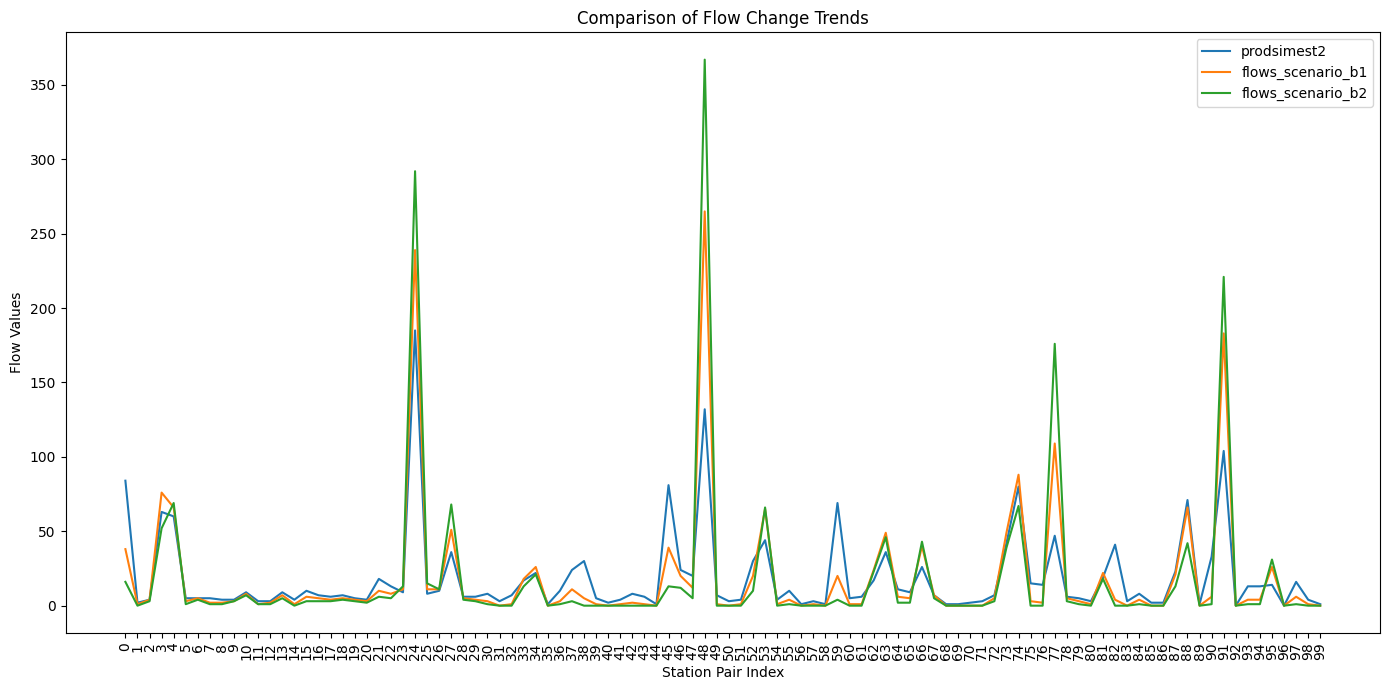

Average percent change for Scenario A: -0.1095213212692517
Average percent change for Scenario B1: -0.4890018188210657
Average percent change for Scenario B2: -0.578749159495351


In [ ]:

# Let's say we have the DataFrame already
# You can plot the trends for the first 50 rows for visualization
plt.figure(figsize=(14, 7))

# Line plot for each scenario
for col in ['prodsimest2', 'flows_scenario_b1', 'flows_scenario_b2']:
    plt.plot(data.iloc[:100][col], label=col)

plt.legend()
plt.title('Comparison of Flow Change Trends')
plt.xlabel('Station Pair Index')
plt.ylabel('Flow Values')
plt.xticks(range(0, 100), rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# You could also calculate the percent change for a more quantitative comparison
percent_change_a = data['prodsimest2'] / data['prodsimest1'] - 1
percent_change_b1 = data['flows_scenario_b1'] / data['prodsimest1'] - 1
percent_change_b2 = data['flows_scenario_b2'] / data['prodsimest1'] - 1

print("Average percent change for Scenario A:", percent_change_a.mean())
print("Average percent change for Scenario B1:", percent_change_b1.mean())
print("Average percent change for Scenario B2:", percent_change_b2.mean())


In [ ]:
# statistics for price increase
orig = data['flows'].describe()
a = data['prodsimest2'].describe()
b1  = data['flows_scenario_b1'].describe()
b2 = data['flows_scenario_b2'].describe()

print("Origin Flow Statistics:")
print(orig)
print("Scenario A Flow Statistics:")
print(a)
print("Scenario B1 Flow Statistics:")
print(b1)
print("Scenario B2 Price Flow Statistics:")
print(b2)

Origin Flow Statistics:
count    61474.000000
mean        25.090136
std        131.416761
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max      15946.000000
Name: flows, dtype: float64
Scenario A Flow Statistics:
count    61474.000000
mean        25.075756
std         80.028712
min          0.000000
25%          1.000000
50%          6.000000
75%         20.000000
max       3562.000000
Name: prodsimest2, dtype: float64
Scenario B1 Flow Statistics:
count    61474.000000
mean        25.066256
std        102.730137
min          0.000000
25%          0.000000
50%          2.000000
75%         13.000000
max       4139.000000
Name: flows_scenario_b1, dtype: float64
Scenario B2 Price Flow Statistics:
count    61474.000000
mean        25.064173
std        131.455688
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max       5517.000000
Name: flows_scenario_b2, dtype: float64
